In [1]:
import pandas as pd

In [2]:
df_store=pd.read_csv('store.csv')

In [3]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
df_store.shape

(1115, 10)

In [5]:
df_train=pd.read_csv('train.csv')

C:\Users\manee\AppData\Local\Temp\ipykernel_11000\2442214653.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('train.csv')


In [6]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
df_train.shape

(1017209, 9)

In [8]:
df=pd.merge(df_store,df_train,on='Store',how='left')

In [9]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [10]:
#convert Date to Datetime
df['Date']=pd.to_datetime(df['Date'])

In [11]:
df['Open'].fillna(1,inplace=True)

C:\Users\manee\AppData\Local\Temp\ipykernel_11000\3976815130.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open'].fillna(1,inplace=True)


In [12]:
df.fillna(0,inplace=True)

In [13]:
df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

# Extract date features

In [14]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day
df['dayofweek']=pd.DatetimeIndex(df['Date']).dayofweek

# Encode categorical features

In [15]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [17]:
df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [18]:
#df['StateHoliday']=df['StateHoliday'].map({'0':0,'a':1,'b':2,'c':3}).astype(int)
#df['StoreType']=df['StoreType'].map({'a':0,'b':1,'c':2,'d':3}).astype(int)
#df['Assortment']=df['Assortment'].map({'a':0,'b':1,'c':2}).astype(int)

# OR

from sklearn.preprocessing import LabelEncoder
le_holiday=LabelEncoder()
le_store=LabelEncoder()
le_ass=LabelEncoder()


In [19]:
#df['StateHoliday']=le_holiday.fit_transform(df['StateHoliday'])
df['StoreType']=le_store.fit_transform(df['StoreType'])
df['Assortment']=le_ass.fit_transform(df['Assortment'])

In [20]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [21]:
df['StateHoliday']=df['StateHoliday'].map({'0':0,'a':1,'b':2,'c':3,0:4}).astype(int)

In [22]:
df['StateHoliday'].unique()

array([0, 1, 2, 3, 4])

# Exploratory Data Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='year'>

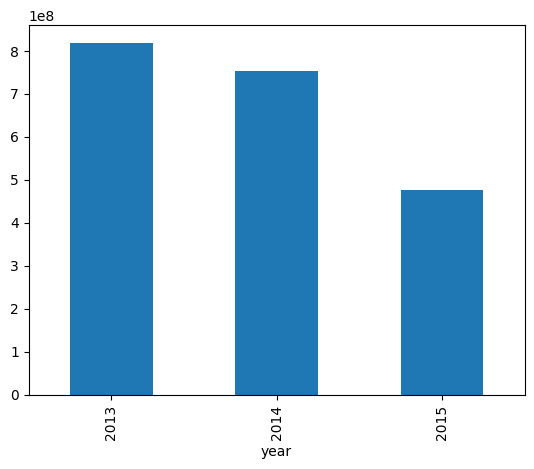

In [24]:
df['year'].groupby(df['year']).sum('Sales').plot(kind='bar')

<Axes: xlabel='month'>

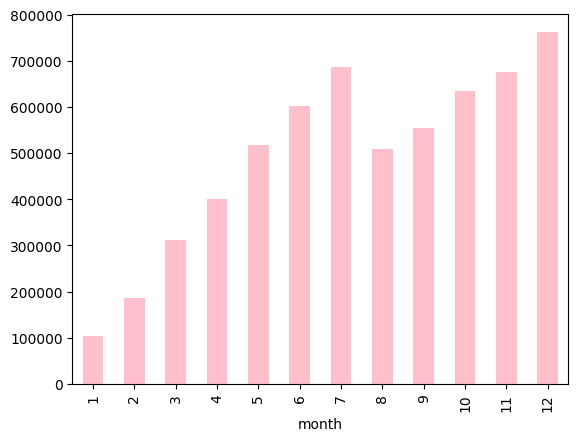

In [25]:
df['month'].groupby(df['month']).sum('Sales').plot(kind='bar',color='pink')

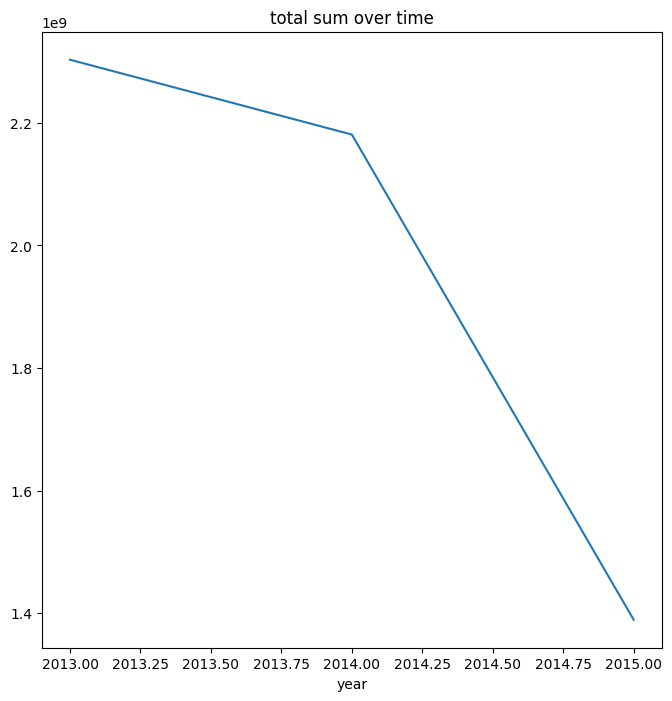

In [26]:
plt.figure(figsize=(8,8))
df.groupby('year')['Sales'].sum().plot()
plt.title('total sum over time')
plt.show()

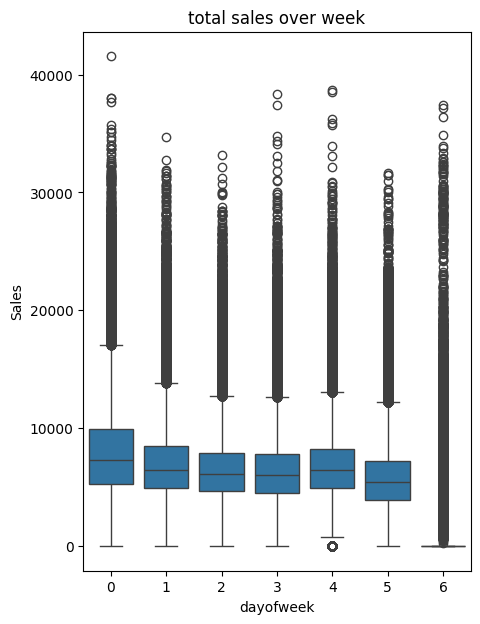

In [27]:
plt.figure(figsize=(5,7))
sns.boxplot(x='dayofweek',y='Sales',data=df)
plt.title('total sales over week')
plt.show()

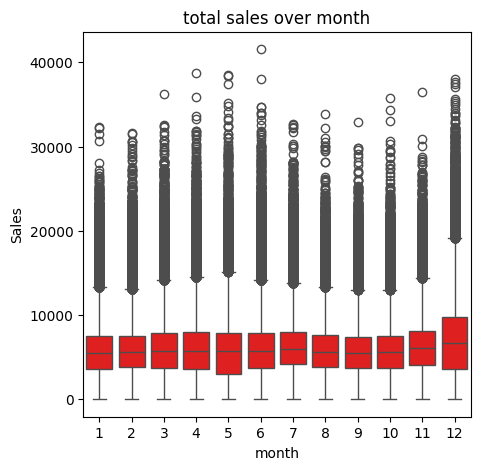

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(x='month',y='Sales',data=df,color='red')
plt.title('total sales over month')
plt.show()

# Feature Engineering

In [29]:
df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [30]:
# Lag Features

df['Sales_lag1']=df.groupby('Store')['Sales'].shift(1)
df['Sales_lag2']=df.groupby('Store')['Sales'].shift(2)

In [31]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,dayofweek,Sales_lag1,Sales_lag2
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,2015,7,31,4,NaN,NaN
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,2015,7,30,3,5263.0,NaN
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,2015,7,29,2,5020.0,5263.0
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,2015,7,28,1,4782.0,5020.0
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,...,1,1,0,1,2015,7,27,0,5011.0,4782.0


In [32]:
# Rolling Statistic

df['rolin_stat_mean']=df.groupby('Store')['Sales'].shift(1).rolling(window=7).mean()
df['rolin_stat_std']=df.groupby('Store')['Sales'].shift(1).rolling(window=7).std()

In [33]:
df.isnull().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
DayOfWeek                       0
Date                            0
Sales                           0
Customers                       0
Open                            0
Promo                           0
StateHoliday                    0
SchoolHoliday                   0
year                            0
month                           0
day                             0
dayofweek                       0
Sales_lag1                   1115
Sales_lag2                   2230
rolin_stat_mean              7805
rolin_stat_std               7805
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
year                         0
month                        0
day                          0
dayofweek                    0
Sales_lag1                   0
Sales_lag2                   0
rolin_stat_mean              0
rolin_stat_std               0
dtype: int64

# Model Training

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [37]:
# Features of the model
x=df[['Store','dayofweek','month','day','year','Promo','StateHoliday','Sales_lag1','Sales_lag2','rolin_stat_mean','rolin_stat_std']]
y=df['Sales']

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=.25)

In [39]:
rfr=RandomForestRegressor(random_state=42,n_estimators=100)

In [ ]:
rfr.fit(xtrain,ytrain)

In [ ]:
pred=rfr.predict(xtest)

In [ ]:
rmse=mean_squared_error(ytest,pred,squared=False)
print(f'RMSE: {rmse}')

# Evalutions

In [ ]:
plt.figure(figsize=(14,7))
plt.scatter(ytest,pred,alpha=0.3)
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()